# Проектная работа - Определение перспективного тарифа для телеком компании

### Table of Contents

* [1. Предобработка данных](#chapter1)
    * [1.1 Изучение общей информации](#section_1_1)
    * [Section 1.2](sSection_1_2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

## 1. Предобработка данных

Импортируем модули, необходимые для работы и загрузим наборы данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
sns.set()

In [2]:
raw_calls = pd.read_csv('datasets/calls.csv')
raw_internet = pd.read_csv('datasets/internet.csv', index_col=0)
raw_messages = pd.read_csv('datasets/messages.csv')
raw_tariffs = pd.read_csv('datasets/tariffs.csv')
raw_users = pd.read_csv('datasets/users.csv')

### 1.1 Изучение общей информации

#### 1.1.a Звонки

In [3]:
raw_calls.sample(10)

,id,call_date,duration,user_id
143594,1363_506,2018-09-29,0.00,1363
95366,1243_13,2018-10-18,14.09,1243
161595,1396_296,2018-02-01,0.00,1396
33954,1083_299,2018-12-22,3.41,1083
117303,1301_195,2018-12-28,16.68,1301
140489,1358_251,2018-07-13,5.07,1358
171843,1425_455,2018-04-28,13.57,1425
94972,1240_500,2018-07-23,3.26,1240
49239,1123_258,2018-07-18,10.64,1123
171534,1425_146,2018-07-28,3.55,1425


In [4]:
raw_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
raw_calls.duration.value_counts()

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

In [6]:
print(f'Звонков с длительностью 0.00: {39613*100/202607:.2f}% от общего числа' )

Звонков с длительностью 0.00: 19.55% от общего числа


In [7]:
raw_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


##### - Нет пропущенных значений;</br> - необходимо представить колонку *call_date* в формате datetime;</br> - Около 20 процентов звонков имеют длительность 0. К сожалению, неизвестно, по какому принципу включались в БД звонки, фиксируются ли пропущенные, или звонки с минимальной длительностью занесены с ошибкой. Предположим второй вариант и, зная правила тарификации, переведём все 0 в 1, и округлим остальные значения в большую сторону. 

#### 1.1.b Интернет

In [8]:
raw_internet.sample(10)

,id,mb_used,session_date,user_id
68511,1232_25,726.54,2018-10-18,1232
27883,1098_57,951.60,2018-12-26,1098
121240,1409_207,0.00,2018-08-20,1409
41540,1145_276,0.00,2018-05-26,1145
29421,1102_295,303.59,2018-10-23,1102
60874,1205_170,791.54,2018-11-17,1205
22057,1073_35,281.62,2018-11-21,1073
125019,1421_204,590.32,2018-07-25,1421
148748,1496_696,811.77,2018-11-14,1496
95020,1321_284,0.00,2018-03-16,1321


In [9]:
raw_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [10]:
raw_internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


##### - Нет пропущенных значений;</br> - Необходимо представить колонку *session_date* в формате datetime;</br> - Для колонки *mb_used* применим тот же принцип ,что и для звонков в предыдущем пункте:0->1 и округление в большую сторону

### 1.1.c Сообщения

In [11]:
raw_messages.sample(10)

,id,message_date,user_id
59362,1259_229,2018-11-26,1259
17763,1077_22,2018-12-18,1077
97082,1396_733,2018-02-13,1396
74563,1315_144,2018-12-13,1315
70849,1300_601,2018-09-06,1300
50276,1222_480,2018-12-01,1222
71742,1302_570,2018-11-09,1302
38380,1166_206,2018-09-03,1166
55211,1244_377,2018-05-25,1244
108929,1438_101,2018-11-11,1438


In [12]:
raw_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
raw_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


##### - Нет пропущенных значений;</br> - Необходимо представить колонку *message_date* в формате datetime;

#### 1.1.d Тарифы

In [14]:
raw_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


##### Здесь имеем характеристики тарифов

#### 1.1.e Пользователи

In [15]:
raw_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [16]:
raw_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
raw_users.age.describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [18]:
raw_users[~(raw_users['churn_date'].isnull())]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


##### Пропущенные значения в колонке churn_date - означают пользователей, контракт которых не истёк на момент подготовки данных. При необходимости, можно обработать путём простановки какой-либо будущей даты, либо вывести выбывших пользователей в отдельный датасет, а из оставшегося убрать колонку с пустыми значениями.</br></br> - Колонку *reg_date* переведём в datetime

### 1.2 Обработка пропущенных значений и типов данных

Переведём колонки ,содержащие даты, из object в datetime

In [19]:
raw_calls['call_date']=pd.to_datetime(raw_calls['call_date'])
raw_internet['session_date']=pd.to_datetime(raw_internet['session_date'])
raw_messages['message_date']=pd.to_datetime(raw_messages['message_date'])
raw_users['reg_date']=pd.to_datetime(raw_users['reg_date'])
raw_users['churn_date']=pd.to_datetime(raw_users['churn_date'])

In [20]:
raw_calls.sample()

,id,call_date,duration,user_id
38101,1094_721,2018-09-22,0.0,1094


Также разделим колонки id там, где это применимо. 

In [21]:
raw_calls['call_id']=raw_calls['id'].apply(lambda x: int(x.split('_')[-1]))
raw_messages['sms_id']=raw_calls['id'].apply(lambda x: int(x.split('_')[-1]))
raw_internet['session_id']=raw_internet['id'].apply(lambda x: int(x.split('_')[-1]))


In [22]:
raw_calls.sample()

,id,call_date,duration,user_id,call_id
91835,1228_247,2018-10-02,2.36,1228,247


Преобразуем 0 в 1 и округлим в большую сторону значения длительности звонков и использованных мегабайт траффика

In [23]:
raw_calls['duration'].where(raw_calls['duration']!=0, 1, inplace=True)
raw_calls['duration']= raw_calls['duration'].apply(np.ceil).astype('int')
raw_calls['duration'].describe()

count    202607.000000
mean          7.353714
std           5.733230
min           1.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

тарифиация идёт по гигабайтам, поэтому преообразуем данные соответсвующим образом

In [24]:
raw_internet['mb_used'].where(raw_internet['mb_used']!=0, 1, inplace=True)
raw_internet['mb_used']= raw_internet['mb_used'].apply(np.ceil).astype('int')
raw_internet['gb_used']= (raw_internet['mb_used']/1024).apply(np.ceil).astype('int')
raw_internet.describe()

,mb_used,user_id,session_id,gb_used
count,149396.000000,149396.000000,149396.000000,149396.000000
mean,370.753280,1252.099842,205.811856,1.015690
std,278.212524,144.050823,157.267497,0.124273
min,1.000000,1000.000000,0.000000,1.000000
25%,139.000000,1130.000000,78.000000,1.000000
50%,349.000000,1251.000000,172.000000,1.000000
75%,560.000000,1380.000000,302.000000,1.000000
max,1725.000000,1499.000000,833.000000,2.000000


### 1.3 Подготовка данных

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

#### 1.3.a Посчитаем и выведем количество сделанных звонков и их продолжительность для каждого абонента

In [25]:
raw_calls['month']=raw_calls['call_date'].dt.month

monthly_call_count = raw_calls.groupby(['user_id', 'month']).agg({'call_id':'count'})

In [26]:
monthly_call_count.columns = ['monthly_call_count']

In [27]:
monthly_call_count

monthly_call_count
user_id month                    
1000    5                      22
        6                      43
        7                      47
        8                      52
        9                      58
...                           ...
1498    10                     41
1499    9                       9
        10                     68
        11                     74
        12                     69

[3174 rows x 1 columns]

In [28]:
monthly_call_dur = raw_calls.groupby(['user_id', 'month']).agg({'duration':'sum'})

In [29]:
monthly_call_dur.columns = ['monthly_call_duration']

In [30]:
monthly_call_dur

monthly_call_duration
user_id month                       
1000    5                        164
        6                        187
        7                        346
        8                        418
        9                        478
...                              ...
1498    10                       258
1499    9                         71
        10                       473
        11                       624
        12                       505

[3174 rows x 1 columns]

#### 1.3.b Посчитаем и выведем количество сообщений в месяц для каждого абонента

In [31]:
raw_messages['month']=raw_messages['message_date'].dt.month

monthly_sms = raw_messages.groupby(['user_id', 'month'])[['sms_id']].count()

In [32]:
monthly_sms.columns = ['monthly_sms']

In [33]:
monthly_sms

monthly_sms
user_id month             
1000    5               22
        6               60
        7               75
        8               81
        9               57
...                    ...
1498    10              42
1499    9               11
        10              48
        11              59
        12              66

[2717 rows x 1 columns]

#### 1.3.c Посчитаем и выведем количество использованного траффика в месяц для каждого абонента

In [34]:
raw_internet['month']=raw_internet['session_date'].dt.month

monthly_gb = raw_internet.groupby(['user_id', 'month'])[['gb_used']].sum()

In [35]:
monthly_gb.columns = ['monthly_gb']

In [36]:
monthly_gb

monthly_gb
user_id month            
1000    5               5
        6              54
        7              29
        8              29
        9              28
...                   ...
1498    10             60
1499    9               6
        10             59
        11             51
        12             45

[3203 rows x 1 columns]

#### 1.3.d Объединим полученную информацию в единый датафрейм </br> 
Применим метод *join* c параметром *outer* чтобы учесть пользователей, которые, не используют какую-то функцию тарифа, используя при этом другие

In [37]:
user_data =(
    monthly_call_count
    .join(monthly_call_dur, how='outer')
    .join(monthly_gb, how='outer')
    .join(monthly_sms, how='outer'))

In [38]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   monthly_call_count     3174 non-null   float64
 1   monthly_call_duration  3174 non-null   float64
 2   monthly_gb             3203 non-null   float64
 3   monthly_sms            2717 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


In [39]:
user_data

monthly_call_count  monthly_call_duration  monthly_gb  \
user_id month                                                          
1000    5                    22.0                  164.0         5.0   
        6                    43.0                  187.0        54.0   
        7                    47.0                  346.0        29.0   
        8                    52.0                  418.0        29.0   
        9                    58.0                  478.0        28.0   
...                           ...                    ...         ...   
1498    10                   41.0                  258.0        60.0   
1499    9                     9.0                   71.0         6.0   
        10                   68.0                  473.0        59.0   
        11                   74.0                  624.0        51.0   
        12                   69.0                  505.0        45.0   

               monthly_sms  
user_id month               
1000    5             22.0  
        6             60.0  
        7             75.0  
        8             81.0  
        9             57.0  
...                    ...  
1498    10            42.0  
1499    9             11.0  
        10            48.0  
        11            59.0  
        12            66.0  

[3214 rows x 4 columns]

Добавим информацию о тарифах, а также городе и возрасте абонентов

In [40]:
raw_users.set_index('user_id', inplace=True)

In [41]:
user_data = user_data.join(raw_users[['tariff', 'city', 'age']], how='inner')

In [42]:
user_data.reset_index()

,user_id,month,monthly_call_count,monthly_call_duration,monthly_gb,monthly_sms,tariff,city,age
0,1000,5,22.0,164.0,5.0,22.0,ultra,Краснодар,52
1,1000,6,43.0,187.0,54.0,60.0,ultra,Краснодар,52
2,1000,7,47.0,346.0,29.0,75.0,ultra,Краснодар,52
3,1000,8,52.0,418.0,29.0,81.0,ultra,Краснодар,52
4,1000,9,58.0,478.0,28.0,57.0,ultra,Краснодар,52
...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,258.0,60.0,42.0,smart,Владикавказ,68
3210,1499,9,9.0,71.0,6.0,11.0,smart,Пермь,35
3211,1499,10,68.0,473.0,59.0,48.0,smart,Пермь,35
3212,1499,11,74.0,624.0,51.0,59.0,smart,Пермь,35


In [43]:
user_data =( user_data.reset_index()
            .merge(raw_tariffs, left_on=['tariff'], right_on='tariff_name', how='inner'))

In [44]:
user_data.head()

,user_id,month,monthly_call_count,monthly_call_duration,monthly_gb,monthly_sms,tariff,city,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,22.0,164.0,5.0,22.0,ultra,Краснодар,52,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,43.0,187.0,54.0,60.0,ultra,Краснодар,52,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,47.0,346.0,29.0,75.0,ultra,Краснодар,52,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,52.0,418.0,29.0,81.0,ultra,Краснодар,52,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,58.0,478.0,28.0,57.0,ultra,Краснодар,52,1000,30720,3000,1950,150,1,1,ultra


In [45]:
def revenue(row):
    base = row['rub_monthly_fee']
    if row['monthly_call_duration']>row['minutes_included']:
        call_revenue = (row['monthly_call_duration']-row['minutes_included'])*row['rub_per_minute']
    else:
        call_revenue = 0
    if row['monthly_gb']>row['mb_per_month_included']/1024:
        internet_revenue = (row['monthly_gb']-row['mb_per_month_included']/1024)*row['rub_per_gb']
    else:
        internet_revenue = 0
    if row['monthly_sms']>row['messages_included']:
        sms_revenue = (row['monthly_sms']-row['messages_included'])*row['rub_per_message']
    else:
        sms_revenue = 0
    return base + call_revenue + internet_revenue + sms_revenue

In [46]:
user_data['revenue']=user_data.apply(revenue, axis=1)

In [47]:
user_data.drop(columns='tariff_name', inplace=True)

## 2. Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. 

Для начала разделим данные на два набора, согласно тарифам пользователей

In [48]:
users_ultra = user_data.query('tariff == "ultra"')
users_ultra.describe()

,user_id,month,monthly_call_count,monthly_call_duration,monthly_gb,monthly_sms,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,985.000000,985.000000,951.000000,951.000000,975.000000,795.000000,985.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000
mean,1263.094416,8.250761,76.016824,560.113565,40.376410,61.161006,46.834518,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4070.406091
std,140.694908,2.871762,42.403348,314.742170,20.104574,45.931026,17.107979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2323.808559
min,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,6.000000,43.000000,318.000000,25.000000,24.000000,30.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,9.000000,75.000000,544.000000,40.000000,51.000000,45.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,3450.000000
75%,1381.000000,11.000000,105.000000,776.500000,54.000000,87.500000,63.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,5550.000000
max,1495.000000,12.000000,244.000000,1727.000000,100.000000,224.000000,75.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,12450.000000


In [49]:
users_ultra.groupby('month')[['user_id']].count()

,user_id
month,
1,9
2,24
3,37
4,55
5,67
6,84
7,91
8,107
9,115


In [50]:
users_smart = user_data.query('tariff == "smart"')
users_smart.describe()

,user_id,month,monthly_call_count,monthly_call_duration,monthly_gb,monthly_sms,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,2229.000000,2229.000000,2223.000000,2223.000000,2228.000000,1922.000000,2229.000000,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.000000
mean,1246.506505,8.346792,58.621233,430.609987,50.436715,38.716441,46.556303,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,7848.088829
std,146.119496,2.920316,25.796101,193.850373,17.468968,26.787949,16.353371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3436.840716
min,1001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,6.000000,40.000000,292.000000,41.000000,17.000000,32.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,5750.000000
50%,1239.000000,9.000000,60.000000,435.000000,52.000000,34.000000,47.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,8040.000000
75%,1376.000000,11.000000,76.000000,561.000000,62.000000,55.000000,62.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,10014.000000
max,1499.000000,12.000000,198.000000,1471.000000,118.000000,143.000000,75.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,22824.000000


Сразу видим, что тарифом *smart* пользуется намного больше людей. 
</br> Для тарифа smart больше значения средней и максимальной выручек 7848 и 22824 против 4070 и 12450 у ultra. 

Посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требовались пользователям каждого тарифа в месяц. Вычислим среднее количество, дисперсию и стандартное отклонение; построим гистограммы

In [51]:
user_smart_sum = users_smart.pivot_table(
                        index = ['month'],
                        values = ['monthly_call_duration', 'monthly_gb', 'monthly_sms'],
                        aggfunc= 'sum',
                        #margins = True, margins_name='Total',
                        )
user_smart_sum.columns = ['calls_sum','gb_sum','sms_sum']
user_smart_sum


,calls_sum,gb_sum,sms_sum
month,,,
1,7128.0,874.0,620.0
2,17766.0,2071.0,1397.0
3,30841.0,3636.0,2453.0
4,42224.0,4715.0,3443.0
5,56175.0,6875.0,4762.0
6,66699.0,8007.0,5478.0
7,84277.0,9929.0,6784.0
8,101800.0,12088.0,7905.0
9,114421.0,13220.0,8746.0


<AxesSubplot:xlabel='month'>

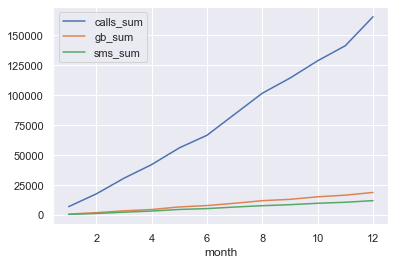

In [52]:
user_smart_sum.plot()

<AxesSubplot:xlabel='month'>

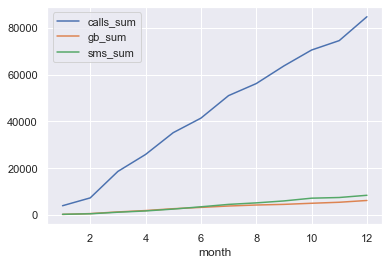

In [53]:
user_ultra_sum = users_ultra.pivot_table(
                        index = ['month'],
                        values = ['monthly_call_duration', 'monthly_gb', 'monthly_sms'],
                        aggfunc= 'sum',
                        #margins = True, margins_name='Total',
                        )
user_ultra_sum.columns = ['calls_sum','gb_sum','sms_sum']
user_ultra_sum.plot()

Видим, что потребление услуг растёт в течение года, но это скорее связано с возрастанием числа пользователей тарифа. Проверим

In [54]:
users_ultra.groupby('month')[['user_id']].count()

,user_id
month,
1,9
2,24
3,37
4,55
5,67
6,84
7,91
8,107
9,115


In [55]:
users_smart.groupby('month')[['user_id']].count()

,user_id
month,
1,34
2,58
3,77
4,112
5,141
6,164
7,201
8,235
9,260


Предположение подтвердилось

In [56]:
user_smart_mean = users_smart.pivot_table(
                        index = ['month'],
                        values = ['monthly_call_duration', 'monthly_gb', 'monthly_sms'],
                        aggfunc= 'mean',
                        margins = True, margins_name='Yearly',
                        )
user_smart_mean.columns = ['calls_mean','gb_mean','sms_mean']
user_smart_mean

print(f'''Среднемесячная длительность звонков абонента тарифа Smart:
{users_smart.monthly_call_duration.mean():2.2f}
Среднемесячная длительность звонков абонента тарифа Ultra:
{users_ultra.monthly_call_duration.mean():2.2f}
Среднемесячное количество потраченного траффика абонента тарифа Smart:
{users_smart.monthly_gb.mean():2.2f}
Среднемесячное количество потраченного траффика абонента тарифа Ultra:
{users_ultra.monthly_gb.mean():2.2f}
Среднемесячное количество отправленных смс абонента тарифа Smart:
{users_smart.monthly_sms.mean():2.2f}
Среднемесячное количество отправленных смс абонента тарифа Ultra:
{users_ultra.monthly_sms.mean():2.2f}
''')

Среднемесячная длительность звонков абонента тарифа Smart:
430.61
Среднемесячная длительность звонков абонента тарифа Ultra:
560.11
Среднемесячное количество потраченного траффика абонента тарифа Smart:
50.44
Среднемесячное количество потраченного траффика абонента тарифа Ultra:
40.38
Среднемесячное количество отправленных смс абонента тарифа Smart:
38.72
Среднемесячное количество отправленных смс абонента тарифа Ultra:
61.16



In [57]:
raw_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Пользователи обоих тарифов обычно укладываются в лимиты на звонки и смс, но не укладываются в лимит траффика, причём, пользователи тарифа Smart затрачивают больше, превышая лимит примерно на 35Гб, что означает 7000 рублей выручки.
Число предоставляемых минут разговора и смс для тарифа Ultra выглядит неоптимальным. 

Посчитаем дисперсию и стандартное отклонение 

In [150]:
print(f'''Дисперсия длительности звонков абонента тарифа Smart:
{np.var(users_smart.monthly_call_duration, ddof=1):2.2f}
Дисперсия звонков абонента тарифа Ultra:
{np.var(users_ultra.monthly_call_duration, ddof=1):2.2f}
Дисперсия потраченного траффика абонента тарифа Smart:
{np.var(users_smart.monthly_gb, ddof=1):2.2f}
Дисперсия потраченного траффика абонента тарифа Ultra:
{np.var(users_ultra.monthly_gb, ddof=1):2.2f}
Дисперсия отправленных смс абонента тарифа Smart:
{np.var(users_smart.monthly_sms, ddof=1):2.2f}
Дисперсия отправленных смс абонента тарифа Ultra:
{np.var(users_ultra.monthly_sms, ddof=1):2.2f}
''')

Дисперсия длительности звонков абонента тарифа Smart:
37577.97
Дисперсия звонков абонента тарифа Ultra:
99062.63
Дисперсия потраченного траффика абонента тарифа Smart:
305.16
Дисперсия потраченного траффика абонента тарифа Ultra:
404.19
Дисперсия отправленных смс абонента тарифа Smart:
717.59
Дисперсия отправленных смс абонента тарифа Ultra:
2109.66



In [151]:
print(f'''Стандартное отклонение длительности звонков абонента тарифа Smart:
{np.std(users_smart.monthly_call_duration, ddof=1):2.2f}
Стандартное отклонение звонков абонента тарифа Ultra:
{np.std(users_ultra.monthly_call_duration, ddof=1):2.2f}
Стандартное отклонение потраченного траффика абонента тарифа Smart:
{np.std(users_smart.monthly_gb, ddof=1):2.2f}
Стандартное отклонение потраченного траффика абонента тарифа Ultra:
{np.std(users_ultra.monthly_gb, ddof=1):2.2f}
Стандартное отклонение отправленных смс абонента тарифа Smart:
{np.std(users_smart.monthly_sms, ddof=1):2.2f}
Стандартное отклонение отправленных смс абонента тарифа Ultra:
{np.std(users_ultra.monthly_sms, ddof=1):2.2f}
''')

Стандартное отклонение длительности звонков абонента тарифа Smart:
193.85
Стандартное отклонение звонков абонента тарифа Ultra:
314.74
Стандартное отклонение потраченного траффика абонента тарифа Smart:
17.47
Стандартное отклонение потраченного траффика абонента тарифа Ultra:
20.10
Стандартное отклонение отправленных смс абонента тарифа Smart:
26.79
Стандартное отклонение отправленных смс абонента тарифа Ultra:
45.93



Теперь представим информацию о длительности звонков, отосланных сообщениях,использованном трафике и выручке в виде гистограмм.


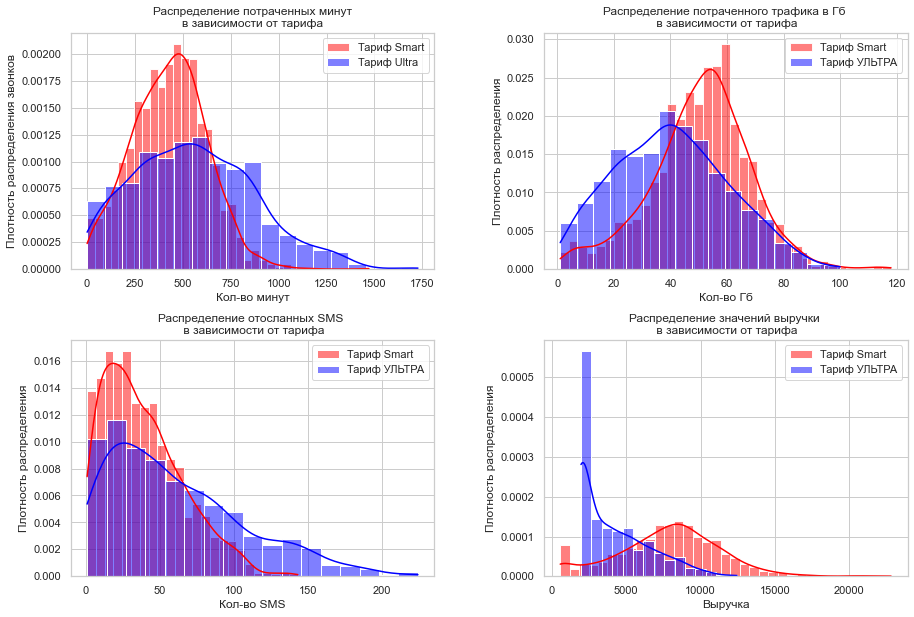

In [62]:

plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set_style('whitegrid')

plt.subplot(2, 2, 1)
sns.histplot(users_smart.monthly_call_duration, label='Тариф Smart', color='red', stat='density', kde=True)
sns.histplot(users_ultra.monthly_call_duration, label='Тариф Ultra', color='blue', stat='density',kde = True)

plt.title('Распределение потраченных минут\nв зависимости от тарифа')
plt.xlabel('Кол-во минут')
plt.ylabel('Плотность распределения звонков')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
sns.histplot(users_smart.monthly_gb, label='Тариф Smart',color='red', stat='density', kde=True)
sns.histplot(users_ultra.monthly_gb, label='Тариф УЛЬТРА', color='blue', stat='density', kde=True)

plt.title('Распределение потраченного трафика в Гб \n в зависимости от тарифа')
plt.xlabel('Кол-во Гб')
plt.ylabel('Плотность распределения')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
sns.histplot(users_smart.monthly_sms, label='Тариф Smart', color='red', stat='density', kde=True)
sns.histplot(users_ultra.monthly_sms, label='Тариф УЛЬТРА', color='blue', stat='density', kde=True)

plt.title('Распределение отосланных SMS \n в зависимости от тарифа')
plt.xlabel('Кол-во SMS')
plt.ylabel('Плотность распределения')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
sns.histplot(users_smart.revenue, label='Тариф Smart', color='red', stat='density', kde=True)
sns.histplot(users_ultra.revenue, label='Тариф УЛЬТРА', color='blue', stat='density', kde=True)

plt.title('Распределение значений выручки \n в зависимости от тарифа')
plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.legend(loc='upper right')

## 3. Проверка гипотез

### 3.1 Cредняя выручка с пользователей тарифов «Ультра» и «Смарт» различается;

Нулевой гипотезой в данном случае будет: средняя выручка не отличается между тарифами

In [152]:
from scipy import stats as st

sample_1 = users_smart.revenue
sample_2 = users_ultra.revenue

alpha = .01 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1987421530845066e-189
Отвергаем нулевую гипотезу


### 3.2 Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Нулевая гипотеза: средняя выручка от пользователей из Москвы не отличается от выручки от пользователей других регионов

In [155]:
sample_1 = user_data.query('city =="Москва"')['revenue']
sample_2 = user_data.query('city!="Москва"')['revenue']

alpha = .05

results = st.ttest_ind(sample_1,sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1608877807395225
Не получилось отвергнуть нулевую гипотезу


## 4. Вывод

1. Тариф Smart приносит значительно больше выручки за счёт более активного использования его клиентами услугами сверх тарифа. Особенно это касается интернет-траффика. 
2. Московские абоненты не отличаются значительно от абонентов из других городов в плане приносимой выручки
3. Абоненты тарифа Ultra, имея возможность отправлять 1000 сообщений и разговаривать 3000 минут в месяц и, отправляли в среднем 60 и разговаривали 560 минут, ни один из выборки не превысил соответствующие тарифные ограничения. Дополнительная выручка образовывалась только за счёт превышения лимита на траффик. 
4. Абоненты тарифа Ultra имея в своём распоряжении больше траффика, в среднем тратили меньше, чем абоненты тарифа smart